In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imagehash
import tqdm
from pathlib import Path

pd.set_option('display.max_columns', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(12, 6)
plt.rcParams['font.size']=10

In [26]:
# Dataset Loading
DATASET_PATH='../../data/food-101/food-101'

dataset_path=Path(DATASET_PATH)
images_path=dataset_path/'images'
meta_path=dataset_path/'meta'

In [49]:
# Count images per class
class_folders=sorted([d for d in images_path.iterdir() if d.is_dir()])

class_counts={}
for class_folder in tqdm.tqdm(class_folders, desc='Processing classes'):
    images=list(class_folder.glob('*.jpg')) + \
        list(class_folder.glob('*.png')) + \
        list(class_folder.glob('*.jpeg'))
    class_counts[class_folder.name]=len(images)

class_counts_df=pd.DataFrame(
    list(class_counts.items()), columns=['Class', 'Image_Count']
).sort_values('Image_Count', ascending=False).reset_index(drop=True)

counts=class_counts_df['Image_Count']
total_images=counts.sum()
num_classes=len(class_counts_df)
mean_count=counts.mean()
median_count=counts.median()
std_count=counts.std()
min_count=counts.min()
max_count=counts.max()

Processing classes: 100%|██████████| 101/101 [00:00<00:00, 204.84it/s]


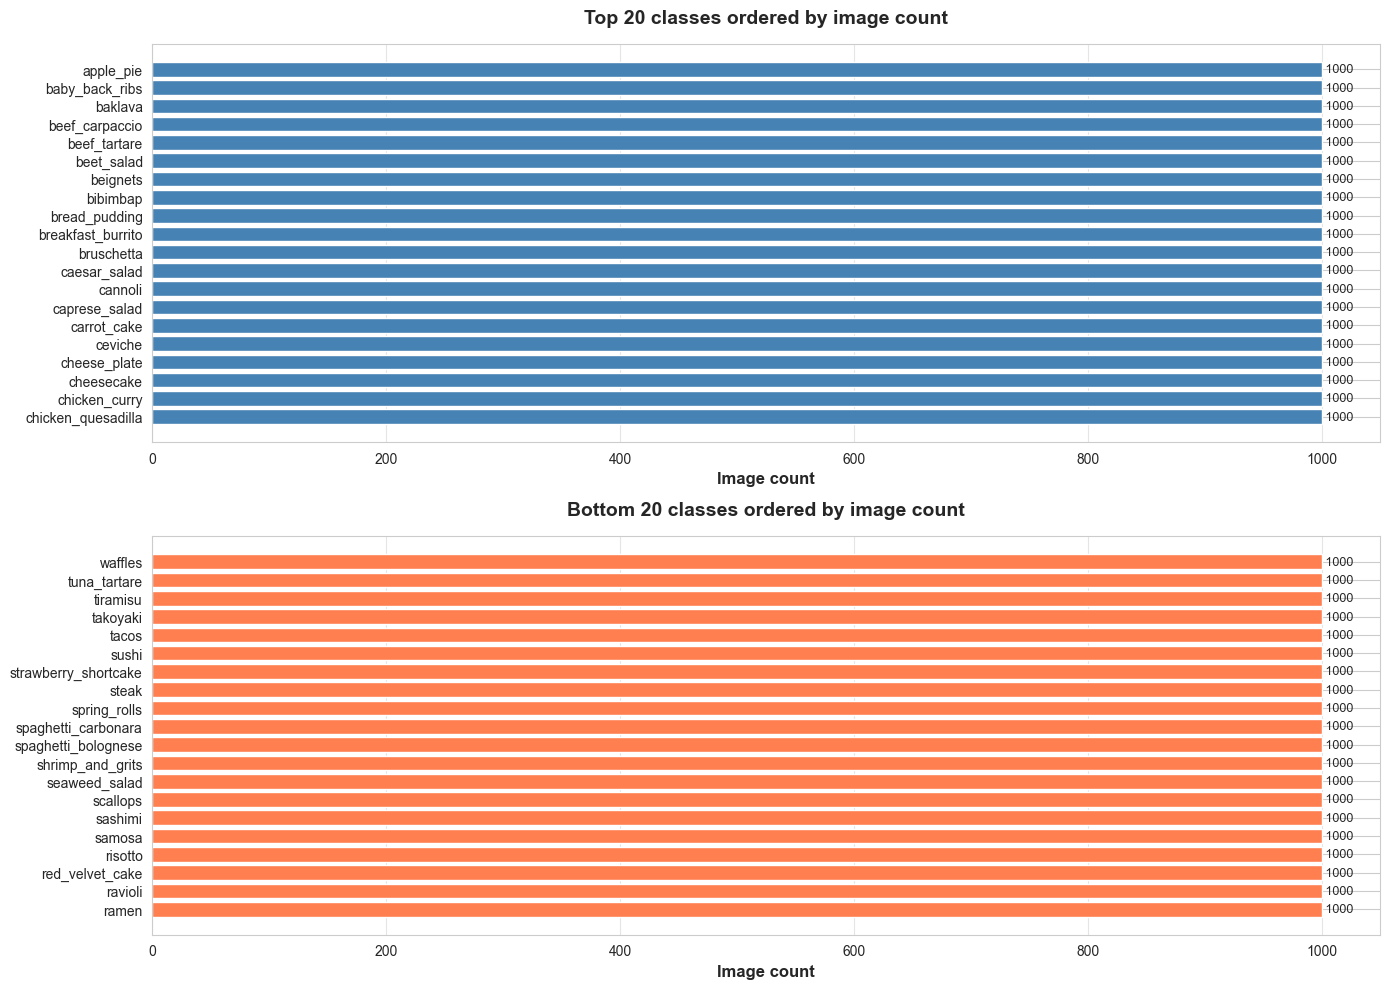

In [101]:
# Viz
fig, (ax1, ax2)=plt.subplots(2, 1, figsize=(14, 10))

top_20=class_counts_df.head(20)
bar1=ax1.barh(range(len(top_20)), top_20['Image_Count'], color='steelblue')
ax1.set_yticks(range(len(top_20)))
ax1.set_yticklabels(top_20['Class'])
ax1.set_xlabel('Image count', fontsize=12, fontweight='bold')
ax1.set_title('Top 20 classes ordered by image count', fontsize=14, fontweight='bold', pad=15)
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.5)

for i, bar in enumerate(bar1):
    width=bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2, f' {int(width)}', ha='left', va='center', fontsize=9)

bot_20=class_counts_df.tail(20)
bar2=ax2.barh(range(len(bot_20)), bot_20['Image_Count'], color='coral')
ax2.set_yticks(range(len(bot_20)))
ax2.set_yticklabels(bot_20['Class'])
ax2.set_xlabel('Image count', fontsize=(12), fontweight='bold')
ax2.set_title('Bottom 20 classes ordered by image count', fontsize=14, fontweight='bold', pad=15)
ax2.invert_yaxis
ax2.grid(axis='x', alpha=0.5)

for i, bar in enumerate(bar2):
    width=bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2, f' {int(width)}', ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()